# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_study=pd.merge(mouse_metadata,study_results,on="Mouse ID",how="outer")
#Act 4.1 Reorder the columns, decided to do this based on your example organization.
mouse_study=mouse_study[["Mouse ID", "Timepoint", "Tumor Volume (mm3)", "Metastatic Sites", "Drug Regimen", "Sex", "Age_months", "Weight (g)"]]
mouse_study.head()
#ASK THIS QUESTION! 
# we seem to have different starting indexes and I am not sure why... Perhaps it is because of the merge?
# It looks like they are sorting by timepoint, and resetting the index, but that doesn't seem to be necessary based on these instructions.
#The example appears to be sorted by Timepoint, but the instructions do not specify how to sort the data.
#ASK THIS QUESTION


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,0,45.000000,0,Ramicane,Male,21,16
1,k403,5,38.825898,0,Ramicane,Male,21,16
2,k403,10,35.014271,1,Ramicane,Male,21,16
3,k403,15,34.223992,1,Ramicane,Male,21,16
4,k403,20,32.997729,1,Ramicane,Male,21,16


In [3]:
# Checking the number of mice.
mouse_count=mouse_study["Mouse ID"].unique()
#print("Individual Mouse ID's: ", mouse_count)
#cleaned up the print statement to be more readable
print("Total Number of Mice: ",len(mouse_count))

Total Number of Mice:  249


In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
sorted_mouse_study = mouse_study.sort_values(["Timepoint", "Mouse ID"], ascending=True)
# to make mine look more like their example, I sorted 1st by Timepoint, then by Mouse ID, however the instructions suggest the opposite.
sorted_mouse_study.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
454,a203,0,45.0,0,Infubinol,Female,20,23
464,a251,0,45.0,0,Infubinol,Female,21,25
474,a262,0,45.0,0,Placebo,Female,17,29
484,a275,0,45.0,0,Ceftamin,Female,20,28
494,a366,0,45.0,0,Stelasyn,Female,16,29


In [5]:
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = sorted_mouse_study[sorted_mouse_study.duplicated(subset=["Timepoint", "Mouse ID"], keep=False)]
#The above code checks for duplicates and keeps all instances of the duplicate, this way we don't miss a duplicate by looking for a specific Mouse ID. 
duplicates
# In this case, we can see that there are duplicate Timepoints for Mouse ID g989, and we need to remove those to ensure the data is clean.
#ASK THIS QUESTION! 
#I don't understand this output you provided: "array(['g989'], dtype=object)"
#ASK THIS QUESTION! 

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
908,g989,0,45.000000,0,Propriva,Female,21,26
909,g989,0,45.000000,0,Propriva,Female,21,26
910,g989,5,48.786801,0,Propriva,Female,21,26
911,g989,5,47.570392,0,Propriva,Female,21,26
912,g989,10,51.745156,0,Propriva,Female,21,26
913,g989,10,49.880528,0,Propriva,Female,21,26
914,g989,15,51.325852,1,Propriva,Female,21,26
915,g989,15,53.442020,0,Propriva,Female,21,26
916,g989,20,55.326122,1,Propriva,Female,21,26
917,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# mouse_count2=duplicates["Mouse ID"].unique()
# #print("Individual Mouse ID's: ", mouse_count)
# #cleaned up the print statement to be more readable
# print("Total Number of Mice: ",len(mouse_count2))

In [7]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicates_data = sorted_mouse_study.loc[sorted_mouse_study["Mouse ID"] == "g989"]
#this forumla will provide all the data for the provided Mouse ID, in this case "g989"
duplicates_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
908,g989,0,45.000000,0,Propriva,Female,21,26
909,g989,0,45.000000,0,Propriva,Female,21,26
910,g989,5,48.786801,0,Propriva,Female,21,26
911,g989,5,47.570392,0,Propriva,Female,21,26
912,g989,10,51.745156,0,Propriva,Female,21,26
913,g989,10,49.880528,0,Propriva,Female,21,26
914,g989,15,51.325852,1,Propriva,Female,21,26
915,g989,15,53.442020,0,Propriva,Female,21,26
916,g989,20,55.326122,1,Propriva,Female,21,26
917,g989,20,54.657650,1,Propriva,Female,21,26


In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_mouse_study = sorted_mouse_study[sorted_mouse_study["Mouse ID"] != "g989"]
#Code provided in support by Xpert Learning Assitant to drop just the duplicate rows for Mouse ID "g989"
#cleaned_mouse_study = cleaned_mouse_study.drop_duplicates(subset=["Mouse ID", "Timepoint"])
cleaned_mouse_study.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
454,a203,0,45.0,0,Infubinol,Female,20,23
464,a251,0,45.0,0,Infubinol,Female,21,25
474,a262,0,45.0,0,Placebo,Female,17,29
484,a275,0,45.0,0,Ceftamin,Female,20,28
494,a366,0,45.0,0,Stelasyn,Female,16,29


In [9]:
#checking for duplicates in the cleaned data.
duplicates2 = cleaned_mouse_study[cleaned_mouse_study.duplicated(subset=["Timepoint", "Mouse ID"], keep=False)]
#The above code checks for duplicates and keeps all instances of the duplicate, this way we don't miss a duplicate by looking for a specific Mouse ID. 
duplicates2
#there are no duplicates in the cleaned data, so we are good to go.

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)


In [10]:
#checking to see if we removed the correct Mouse ID
mouse_count3=cleaned_mouse_study["Mouse ID"].unique()
mouse_count3 = cleaned_mouse_study[cleaned_mouse_study["Mouse ID"] == 'g989']
print(mouse_count3)
#g989 has been removed from the array.... so we are good to go.

Empty DataFrame
Columns: [Mouse ID, Timepoint, Tumor Volume (mm3), Metastatic Sites, Drug Regimen, Sex, Age_months, Weight (g)]
Index: []


In [11]:
# Checking the number of mice in the clean DataFrame.
cleaned_mouse_count=cleaned_mouse_study["Mouse ID"].unique()
print("Total Number of Mice: ",len(cleaned_mouse_count))
#however, based on your example you have removed the ALL duplicates, not just the duplicate ROWS for the Mouse ID g989. Why?
# I went through ALL THAT and I was just using the wrong mouse_count variable... I should have been using cleaned_mouse_count the whole time ARGH! 


Total Number of Mice:  248


## Summary Statistics

In [12]:
# Code created in partnership with Matthew Sanders
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
summary_stats = cleaned_mouse_study.groupby("Drug Regimen")['Tumor Volume (mm3)'].mean().rename('Mean Tumor Volume').to_frame()
summary_stats['Median Tumor Volume'] = cleaned_mouse_study.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
summary_stats['Variance Tumor Volume'] = cleaned_mouse_study.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
summary_stats['Standard Deviation Tumor Volume'] = cleaned_mouse_study.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
summary_stats['SEM Tumor Volume'] = cleaned_mouse_study.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()
summary_stats


,Mean Tumor Volume,Median Tumor Volume,Variance Tumor Volume,Standard Deviation Tumor Volume,SEM Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [13]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
summmary_stats2 = cleaned_mouse_study.groupby("Drug Regimen")['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
# Using the aggregation method, produce the same summary statistics in a single line
summmary_stats2

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

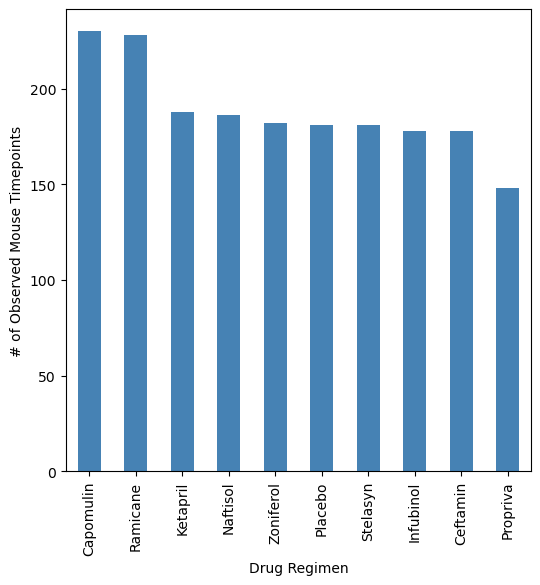

In [14]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
panda_counts = cleaned_mouse_study['Drug Regimen'].value_counts()
panda_counts.plot(kind='bar', color= 'steelblue', width=0.5, figsize=(6,6))
#I don't know what blue you used in your example, so I just picked a blue that I liked.
plt.ylabel('# of Observed Mouse Timepoints')
plt.xlabel('Drug Regimen')
plt.show()

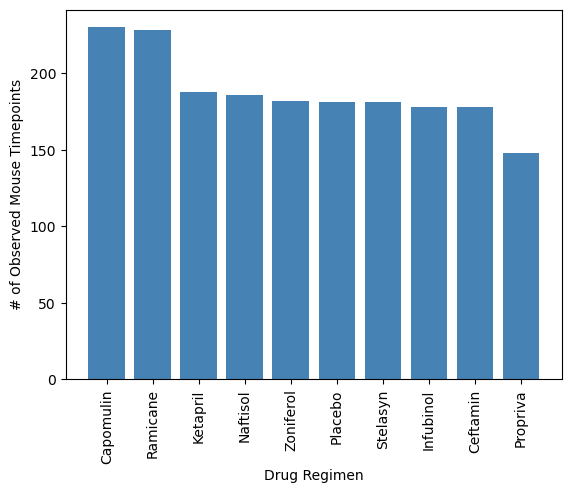

In [15]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(panda_counts.index, panda_counts, color='steelblue', width=0.8)
plt.xticks(rotation=90)
plt.ylabel('# of Observed Mouse Timepoints')
plt.xlabel('Drug Regimen')
plt.show()

In [16]:
print(cleaned_mouse_study.columns) 

Index(['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites',
       'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)'],
      dtype='object')


In [17]:
sex_counts = cleaned_mouse_study['Sex'].value_counts()
print(sex_counts)

Sex
Male      958
Female    922
Name: count, dtype: int64


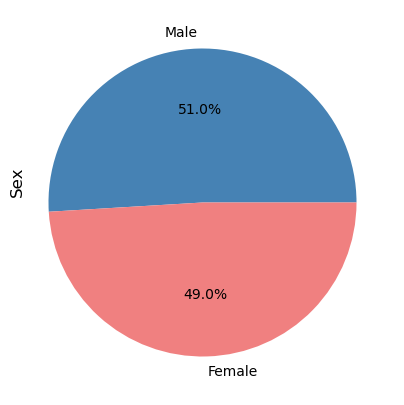

In [18]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_counts = cleaned_mouse_study['Sex'].value_counts()
# #learned we have to convert the series to a dataframe to use the plot function
gender_counts_df = sex_counts.to_frame()
gender_counts_df.plot.pie(y=0, figsize=(5,5), colors=['steelblue', 'lightcoral'], autopct='%1.1f%%', legend=False)
plt.title('Sex', loc='left', y=0.5, rotation=90)
#I cannot seem to figure out how to move the title to the left side of the pie chart, I have tried everything I can think of.
#I got it with the help of Xpert Learning Assistant, I had to use the loc and y parameters to move the title to the left side of the pie chart.
plt.ylabel('')
plt.show() 



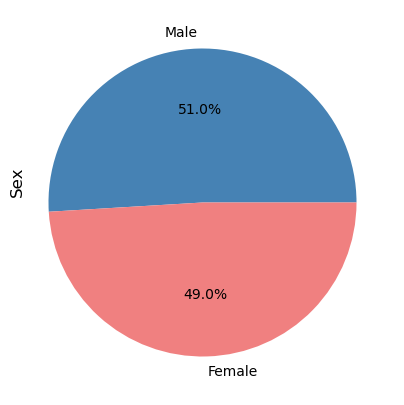

In [19]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_counts = cleaned_mouse_study['Sex'].value_counts()
plt.figure(figsize=(5,5))
plt.pie(sex_counts, labels=sex_counts.index, colors=['steelblue', 'lightcoral'], autopct='%1.1f%%')
#didn't need to add the legend = false, because there is no legend in the pie chart... you have to manually add it in the labels.
plt.title('Sex', loc='left', y=0.5, rotation=90)
plt.ylabel('')
plt.show()

## Quartiles, Outliers and Boxplots

In [20]:
last_great_time = cleaned_mouse_study.groupby('Mouse ID')['Timepoint'].max()
last_great_time

Mouse ID
a203    45
a251    45
a262    45
a275    45
a366    30
        ..
z435    10
z578    45
z581    45
z795    45
z969    45
Name: Timepoint, Length: 248, dtype: int64

In [21]:
cleaned_mouse_study
#displaying the DataFrame to see what the data looks like

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
454,a203,0,45.000000,0,Infubinol,Female,20,23
464,a251,0,45.000000,0,Infubinol,Female,21,25
474,a262,0,45.000000,0,Placebo,Female,17,29
484,a275,0,45.000000,0,Ceftamin,Female,20,28
494,a366,0,45.000000,0,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
1855,y865,45,64.729837,3,Ceftamin,Male,23,26
84,z578,45,30.638696,0,Ramicane,Male,11,16
1872,z581,45,62.754451,3,Infubinol,Female,24,25
1882,z795,45,65.741070,3,Naftisol,Female,13,29


In [22]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# BoxPlots can be found in 5 Data Visualization Activities 02 INS Quartiles and Outliers

# Start by getting the last (greatest) timepoint for each mouse
last_great_time = cleaned_mouse_study.groupby('Mouse ID')['Timepoint'].max()
last_great_time

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
#merge code provided Brandon Wong to ensure that the data is merged correctly.
final_merge = pd.merge(last_great_time, cleaned_mouse_study, on=['Mouse ID','Timepoint'], how='left')
final_merge


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [23]:
# Monica our teacher helped me better understand the prompts and how to approach this problem.
# Put treatments into a list for for loop (and later for plot labels), I get this
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting), I get this
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for treatment in treatments: # I get this
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vol = final_merge.loc[final_merge['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    
    # Add tumor volumes to the list
    # after we find them, then we need to update our empty list.
    tumor_vol_data.append(tumor_vol)
    
    # Calculate quartiles, IQR, and bounds
    # we talked about quartiles in activity module 5.3.2. I copied that code here 
    quartiles = tumor_vol.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    
    # Determine outliers using upper and lower bounds
    outliers = tumor_vol.loc[(tumor_vol < lower_bound) | (tumor_vol > upper_bound)]
    
    # Print potential outliers for each treatment regimen
    print(f"{treatment}'s potential outliers: {outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


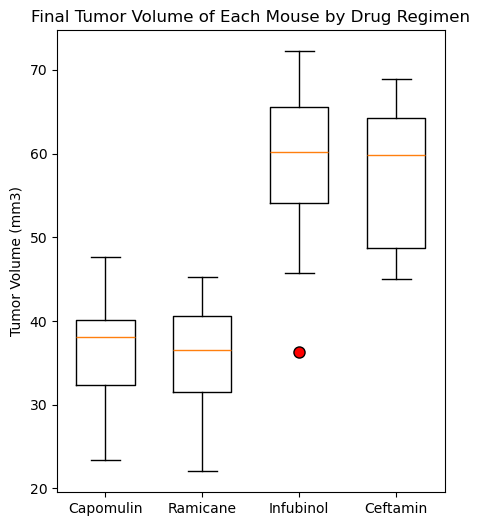

In [24]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
# Create a variable for drug to compare with their respective Tumor Volume
capomulin = final_merge[final_merge['Drug Regimen'] == 'Capomulin']['Tumor Volume (mm3)']
ramicane = final_merge[final_merge['Drug Regimen'] == 'Ramicane']['Tumor Volume (mm3)']
infubinol = final_merge[final_merge['Drug Regimen'] == 'Infubinol']['Tumor Volume (mm3)']
ceftamin = final_merge[final_merge['Drug Regimen'] == 'Ceftamin']['Tumor Volume (mm3)']

# Combine the new drug variables into a list
drugs = [capomulin, ramicane, infubinol, ceftamin]

# Create a boxplot with drug regimen as x-axis
plt.figure(figsize=(5, 6))
#color and marker directions provided by Xpert Learning Assistant
plt.boxplot(drugs, labels=['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'], widths=0.6, flierprops=dict(marker='o', markerfacecolor='red', markersize=8))
plt.title('Final Tumor Volume of Each Mouse by Drug Regimen')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

In [25]:
cleaned_mouse_study.loc[cleaned_mouse_study['Drug Regimen'] == 'Capomulin']

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
300,b128,0,45.000000,0,Capomulin,Female,9,22
290,b742,0,45.000000,0,Capomulin,Male,7,21
60,f966,0,45.000000,0,Capomulin,Male,16,17
235,g288,0,45.000000,0,Capomulin,Male,3,19
351,g316,0,45.000000,0,Capomulin,Female,22,22
...,...,...,...,...,...,...,...,...
104,u364,45,31.023923,3,Capomulin,Male,18,17
350,v923,45,40.658124,2,Capomulin,Female,19,21
224,w914,45,36.041047,2,Capomulin,Male,24,21
29,x401,45,28.484033,0,Capomulin,Female,16,15


In [26]:
cleaned_mouse_study.loc[cleaned_mouse_study['Mouse ID'] == 'l509']
# so this code should return the data for the mouse ID i509, but it is only empty...... it was mouse L and not I....

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
371,l509,0,45.000000,0,Capomulin,Male,17,21
372,l509,5,45.851193,0,Capomulin,Male,17,21
373,l509,10,46.759074,0,Capomulin,Male,17,21
374,l509,15,47.488599,1,Capomulin,Male,17,21
375,l509,20,48.070452,2,Capomulin,Male,17,21
376,l509,25,44.006257,2,Capomulin,Male,17,21
377,l509,30,44.708055,2,Capomulin,Male,17,21
378,l509,35,40.207288,2,Capomulin,Male,17,21
379,l509,40,40.770813,2,Capomulin,Male,17,21
380,l509,45,41.483008,3,Capomulin,Male,17,21


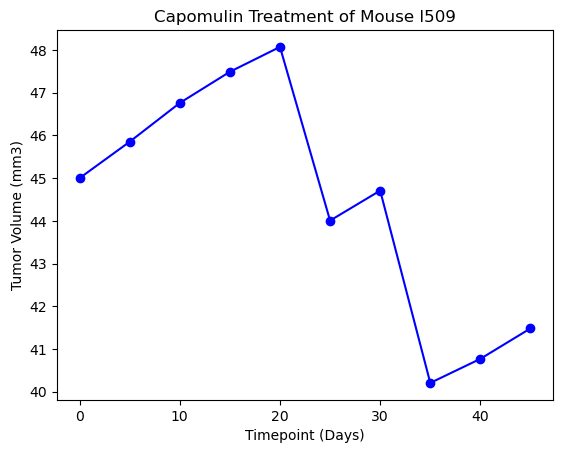

In [27]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
plt.plot(cleaned_mouse_study.loc[cleaned_mouse_study['Mouse ID'] == 'l509', 'Timepoint'], cleaned_mouse_study.loc[cleaned_mouse_study['Mouse ID'] == 'l509', 'Tumor Volume (mm3)'], color= 'blue', marker='o')
plt.title('Capomulin Treatment of Mouse l509')
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

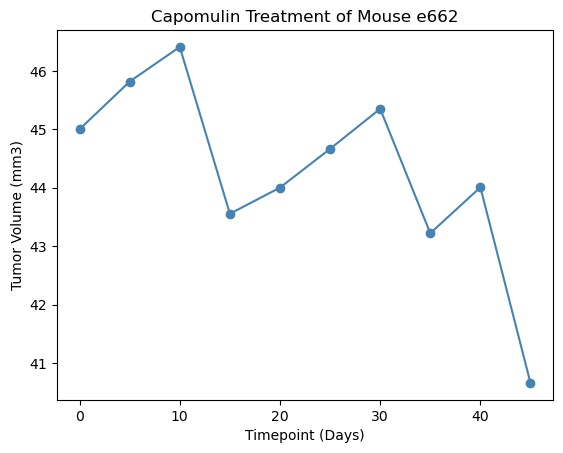

In [33]:
# Did some playing around to learn a new to do this. 

import random

# Choose a random Mouse ID
random_mouse_id = random.choice(cleaned_mouse_study['Mouse ID'])

# Filter the DataFrame for the randomly selected Mouse ID
# had to create a DataFrame for the random mouse ID to pull from. 
random_mouse_data = cleaned_mouse_study[cleaned_mouse_study['Mouse ID'] == random_mouse_id]

# Plot the data for the randomly selected Mouse ID
plt.plot(random_mouse_data['Timepoint'], random_mouse_data['Tumor Volume (mm3)'], color= 'steelblue', marker='o')
plt.title(f"Capomulin Treatment of Mouse {random_mouse_id}")
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()


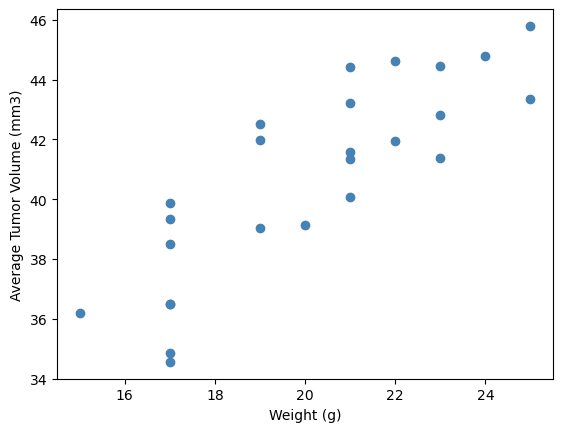

In [40]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# determine the average: 
target_tumor_volume = cleaned_mouse_study.loc[cleaned_mouse_study['Drug Regimen'] == 'Capomulin']
average_tumor_volume = target_tumor_volume.groupby(["Mouse ID"])[['Weight (g)','Tumor Volume (mm3)']].mean()

#average_tumor_volume
plt.scatter(average_tumor_volume['Weight (g)'], average_tumor_volume['Tumor Volume (mm3)'], color='steelblue')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

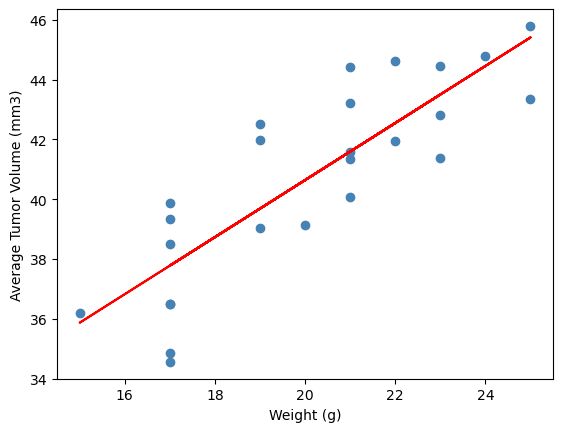

The correlation between mouse weight and the average tumor volume is 0.84


In [54]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

target_tumor_volume = cleaned_mouse_study.loc[cleaned_mouse_study['Drug Regimen'] == 'Capomulin']
average_tumor_volume = target_tumor_volume.groupby(["Mouse ID"])[['Weight (g)','Tumor Volume (mm3)']].mean()

# Linear regression from 5.3.8
(slope, intercept, r_value, p_value, std_err) = st.linregress(average_tumor_volume['Weight (g)'], average_tumor_volume['Tumor Volume (mm3)'])
regress_values = average_tumor_volume * slope + intercept
#I don't know why we had to add linregress to the code, I don't see it in the example code. In the activity it was the name for running scipy.stats, but here we use st. instead of scipy.stats.

# Calculate the predicted values
predicted_tumor_volume = slope * average_tumor_volume['Weight (g)'] + intercept

# Plot the regression line
plt.plot(average_tumor_volume['Weight (g)'], predicted_tumor_volume, color='red', label='Trend')

#average_tumor_volume
plt.scatter(average_tumor_volume['Weight (g)'], average_tumor_volume['Tumor Volume (mm3)'], color='steelblue')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

#copied and translated the code from the example to get the correlation coefficient
correlation = st.pearsonr(average_tumor_volume['Weight (g)'], average_tumor_volume['Tumor Volume (mm3)'])
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")

In [42]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
